In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [3]:
path = r'D:\Data_Analytics\Project 3\Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
brands = ["Audi","BMW","Ford","Hyundi","Mercedes Benz","Skoda","Toyota","Volkswagen"]

for filename, brand in zip(all_files, brands):
    df = pd.read_csv(filename, index_col=None, header=0)
    df["make"] = brand
    li.append(df)
    
frame = pd.concat(li, axis=0, ignore_index=True)
frame


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Volkswagen
85551,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Volkswagen
85552,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Volkswagen
85553,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Volkswagen


In [4]:
frame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
make            0
dtype: int64

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85555 entries, 0 to 85554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         85555 non-null  object 
 1   year          85555 non-null  int64  
 2   price         85555 non-null  int64  
 3   transmission  85555 non-null  object 
 4   mileage       85555 non-null  int64  
 5   fuelType      85555 non-null  object 
 6   tax           85555 non-null  int64  
 7   mpg           85555 non-null  float64
 8   engineSize    85555 non-null  float64
 9   make          85555 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 6.5+ MB


In [7]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
audi_one_hot = pd.get_dummies(frame, columns =['model', 'transmission', 'fuelType', 'make'])
audi_one_hot.head()
### END SOLUTION

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,fuelType_Other,fuelType_Petrol,make_Audi,make_BMW,make_Ford,make_Hyundi,make_Mercedes Benz,make_Skoda,make_Toyota,make_Volkswagen
0,2017,12500,15735,150,55.4,1.4,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,2017,16800,25952,145,67.3,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [8]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = audi_one_hot.drop(['price'],axis=1)
y = audi_one_hot["price"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(85555, 195) (85555, 1)


In [9]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [11]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [12]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
audi_model = LinearRegression()
audi_model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

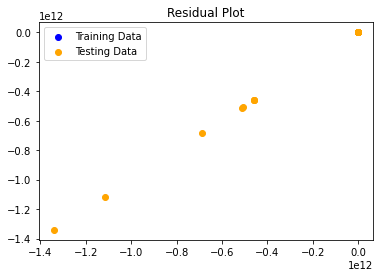

In [13]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = audi_model.predict(X_test_scaled)
audi_model.fit(X_train_scaled, y_train_scaled)
plt.scatter(audi_model.predict(X_train_scaled), audi_model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(audi_model.predict(X_test_scaled), audi_model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [14]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = audi_model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.1854206298424115e+20, R2: -2.1687343525194436e+20


In [15]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 15538676.367598945, R2: 0.8503986833134


C:\Users\catal\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399138830301.5484, tolerance: 661385840.363199
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")